# Imports , loading data, Imputation

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [49]:
import pandas as pd

# Define the structure of the dataset
columns = ['from', 'to', 'PM10', 'PM2.5', 'NO', 'NO2', 'NOX', 'CO', 'SO2', 'NH3', 'Ozone', 'Benzene']

data = pd.read_csv(r'/content/updata.csv', index_col=0)

# Convert timestamp columns to datetime
data['from'] = pd.to_datetime(data['from'], format='%Y-%m-%d %H:%M:%S')
data['to'] = pd.to_datetime(data['to'], format='%Y-%m-%d %H:%M:%S')

# Display the processed data
data.head()


from                  to   PM10  PM2.5  NO   NO2   NOX    CO  \
#                                                                               
1 2023-02-01 00:00:00 2023-02-01 00:15:00   95.0   35.0 NaN  90.1  56.2  0.31   
2 2023-02-01 00:15:00 2023-02-01 00:30:00   95.0   35.0 NaN  88.0  55.1  0.33   
3 2023-02-01 00:30:00 2023-02-01 00:45:00   95.0   35.0 NaN  87.7  55.2  0.38   
4 2023-02-01 00:45:00 2023-02-01 01:00:00  122.0   34.0 NaN  88.9  55.7  0.38   
5 2023-02-01 01:00:00 2023-02-01 01:15:00  122.0   34.0 NaN  90.0  55.8  0.38   

   SO2   NH3  Ozone  Benzene  
#                             
1  NaN  17.7   28.1      0.4  
2  NaN  18.3   27.1      0.4  
3  NaN  19.7   24.9      0.4  
4  NaN  21.3   21.9      0.4  
5  NaN  22.3   16.7      0.4

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8640 entries, 1 to 8640
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   from     8640 non-null   datetime64[ns]
 1   to       8640 non-null   datetime64[ns]
 2   PM10     6959 non-null   float64       
 3   PM2.5    8414 non-null   float64       
 4   NO       7271 non-null   float64       
 5   NO2      8224 non-null   float64       
 6   NOX      8225 non-null   float64       
 7   CO       8144 non-null   float64       
 8   SO2      7189 non-null   float64       
 9   NH3      8314 non-null   float64       
 10  Ozone    8187 non-null   float64       
 11  Benzene  2445 non-null   float64       
dtypes: datetime64[ns](2), float64(10)
memory usage: 877.5 KB


In [51]:
# Impute missing values in each column with its column-specific average
# data = data.apply(lambda col: col.fillna(col.mean()) if col.dtype in ['float64', 'int64'] else col)
# Apply interpolation to numeric columns, leave others unchanged
def fill_with_avg_and_interpolate(col):
    if col.dtype in ['float64', 'int64']:  # Check if column is numeric
        col = col.interpolate(method='spline', order=2)  # Perform spline interpolation
        # Replace NaN at the start and end with the column mean
        col.fillna(col.mean(), inplace=True)
    return col

# Apply the function to all columns in the DataFrame
data = data.apply(fill_with_avg_and_interpolate)



In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8640 entries, 1 to 8640
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   from     8640 non-null   datetime64[ns]
 1   to       8640 non-null   datetime64[ns]
 2   PM10     8640 non-null   float64       
 3   PM2.5    8640 non-null   float64       
 4   NO       8640 non-null   float64       
 5   NO2      8640 non-null   float64       
 6   NOX      8640 non-null   float64       
 7   CO       8640 non-null   float64       
 8   SO2      8640 non-null   float64       
 9   NH3      8640 non-null   float64       
 10  Ozone    8640 non-null   float64       
 11  Benzene  8640 non-null   float64       
dtypes: datetime64[ns](2), float64(10)
memory usage: 877.5 KB


# Focus on Blasting Time (13:45–14:45)

In [53]:
# Ensure numerical columns are properly handled
pollutant_columns = ['PM10', 'PM2.5', 'NO', 'NO2', 'NOX', 'CO', 'SO2', 'NH3', 'Ozone', 'Benzene']
data[pollutant_columns] = data[pollutant_columns].apply(pd.to_numeric, errors='coerce')

In [54]:
# Filter data for the blasting time range (strictly within 13:45 to 14:45)
# Filter data for the blasting time range (inclusive of 14:45)
blasting_time_data = data[
    (data['from'].dt.time >= pd.to_datetime('13:45:00').time()) &
    (data['from'].dt.time <= pd.to_datetime('14:45:00').time()) &
    (data['to'].dt.time >= pd.to_datetime('13:45:00').time()) &
    (data['to'].dt.time <= pd.to_datetime('14:45:00').time())
]


print("Blasting Time Data :")

blasting_time_data.head()


Blasting Time Data :


from                  to   PM10  PM2.5         NO   NO2  \
#                                                                            
56  2023-02-01 13:45:00 2023-02-01 14:00:00   73.0   18.0  14.428266  59.9   
57  2023-02-01 14:00:00 2023-02-01 14:15:00   73.0   18.0  14.428266  62.4   
58  2023-02-01 14:15:00 2023-02-01 14:30:00   73.0   18.0  14.428266  61.1   
59  2023-02-01 14:30:00 2023-02-01 14:45:00   73.0   18.0  14.428266  59.0   
152 2023-02-02 13:45:00 2023-02-02 14:00:00  135.0   30.0  14.428266  74.1   

      NOX    CO        SO2   NH3  Ozone  Benzene  
#                                                 
56   34.8  0.31  35.620127  20.5   56.9      0.1  
57   36.2  0.30  35.620127  20.7   56.8      0.1  
58   35.0  0.31  35.620127  21.5   57.1      0.1  
59   34.0  0.34  35.620127  22.0   55.0      0.1  
152  47.1  1.08  35.620127  19.9   50.5      0.1

In [55]:
blasting_time_data.tail()

from                  to  PM10  PM2.5   NO   NO2   NOX  \
#                                                                            
8507 2023-04-30 14:30:00 2023-04-30 14:45:00  32.0    4.0  3.4  85.6  48.3   
8600 2023-05-01 13:45:00 2023-05-01 14:00:00  15.0    4.0  2.3  80.6  44.7   
8601 2023-05-01 14:00:00 2023-05-01 14:15:00  15.0    4.0  3.2  80.9  45.6   
8602 2023-05-01 14:15:00 2023-05-01 14:30:00  15.0    4.0  3.6  82.4  46.7   
8603 2023-05-01 14:30:00 2023-05-01 14:45:00  15.0    4.0  4.1  82.5  47.2   

            CO  SO2  NH3  Ozone  Benzene  
#                                         
8507  1.301915  4.1  9.8   46.0      0.1  
8600  0.530000  5.8  9.8   63.1      0.1  
8601  0.550000  5.4  9.2   60.9      0.1  
8602  0.570000  7.3  9.4   61.0      0.1  
8603  0.570000  9.5  9.6   61.9      0.1

In [56]:
blasting_time_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 360 entries, 56 to 8603
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   from     360 non-null    datetime64[ns]
 1   to       360 non-null    datetime64[ns]
 2   PM10     360 non-null    float64       
 3   PM2.5    360 non-null    float64       
 4   NO       360 non-null    float64       
 5   NO2      360 non-null    float64       
 6   NOX      360 non-null    float64       
 7   CO       360 non-null    float64       
 8   SO2      360 non-null    float64       
 9   NH3      360 non-null    float64       
 10  Ozone    360 non-null    float64       
 11  Benzene  360 non-null    float64       
dtypes: datetime64[ns](2), float64(10)
memory usage: 36.6 KB


# Descriptive Analysis

Frequency

In [57]:
# Frequency count of readings during blasting time
frequency = blasting_time_data.groupby(blasting_time_data['from'].dt.hour).size()
print("Frequency Count(no of readings in ith hour):")
frequency


Frequency Count(no of readings in ith hour):


from
13     90
14    270
dtype: int64

Central Tendency

In [58]:
# Mean, median, and mode for pollutants
central_tendency = blasting_time_data[pollutant_columns].agg(['mean', 'median'])
print("Central Tendency Measures:")
central_tendency

Central Tendency Measures:


PM10      PM2.5        NO        NO2        NOX        CO  \
mean    146.37233  38.025312  6.678075  47.525561  30.503628  1.090326   
median  113.00000  31.000000  3.900000  41.750000  27.000000  1.055000   

              SO2        NH3      Ozone   Benzene  
mean    51.769462  12.795135  65.587671  0.139567  
median  33.250000  10.100000  67.700000  0.140345

Dispersion

In [59]:
# Standard deviation and variance
dispersion = blasting_time_data[pollutant_columns].agg(['std', 'var'])
print("Dispersion Measures:")
dispersion


Dispersion Measures:


PM10        PM2.5         NO         NO2         NOX        CO  \
std    263.265139    31.754935   8.072726   20.586685   15.614767  0.541921   
var  69308.533385  1008.375866  65.168908  423.811602  243.820935  0.293679   

             SO2        NH3       Ozone   Benzene  
std    59.975949   7.299681   18.142031  0.032328  
var  3597.114415  53.285341  329.133274  0.001045

Position

In [60]:
# Percentiles
position = blasting_time_data[pollutant_columns].quantile([0.25, 0.5, 0.75])
print("Position Measures (Percentiles):")
position


Position Measures (Percentiles):


PM10  PM2.5   NO     NO2     NOX     CO    SO2    NH3   Ozone  \
0.25   72.000000   22.0  3.3  29.200  18.175  0.700  17.85   8.60  60.100   
0.50  113.000000   31.0  3.9  41.750  27.000  1.055  33.25  10.10  67.700   
0.75  151.480381   46.0  6.0  61.475  36.700  1.480  64.20  12.45  76.425   

       Benzene  
0.25  0.100000  
0.50  0.140345  
0.75  0.169833

# Trend and Seasonality Analysis (blasting time)

Seasonal Decomposition for PM10


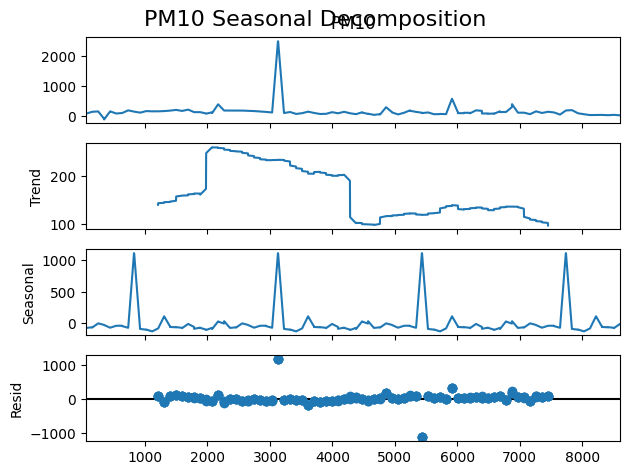

Seasonal Decomposition for PM2.5


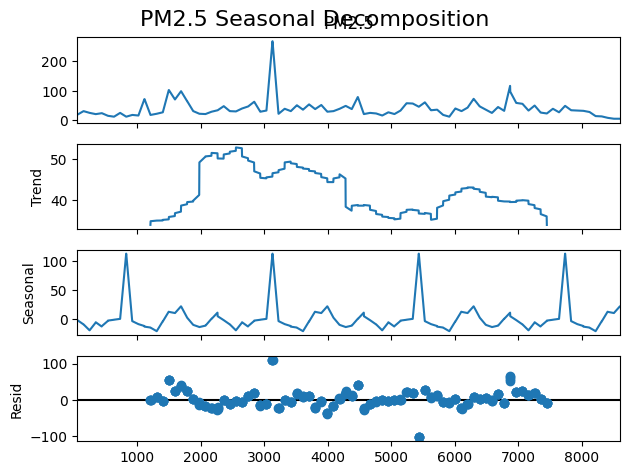

Seasonal Decomposition for NO


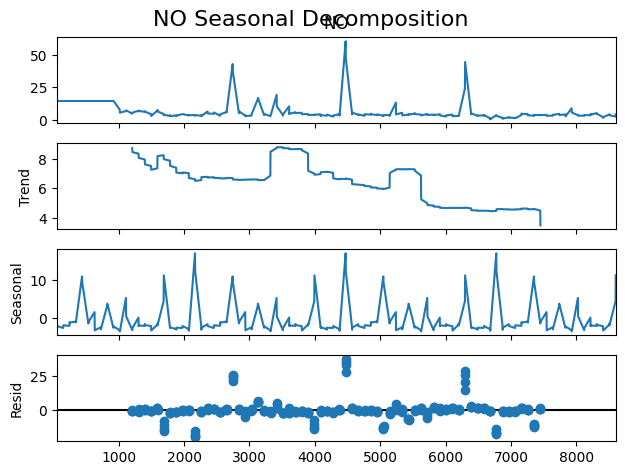

Seasonal Decomposition for NO2


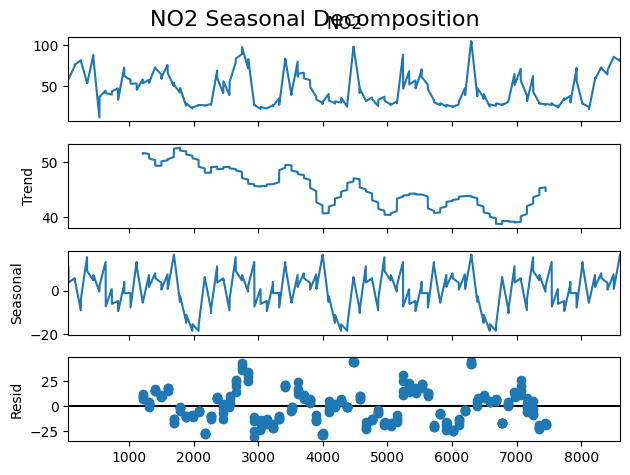

Seasonal Decomposition for NOX


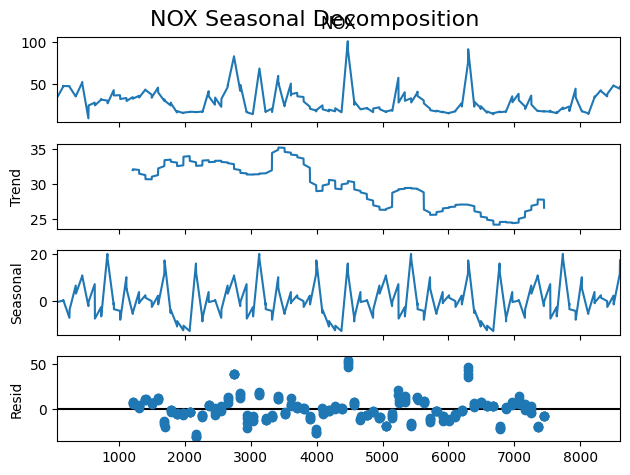

Seasonal Decomposition for CO


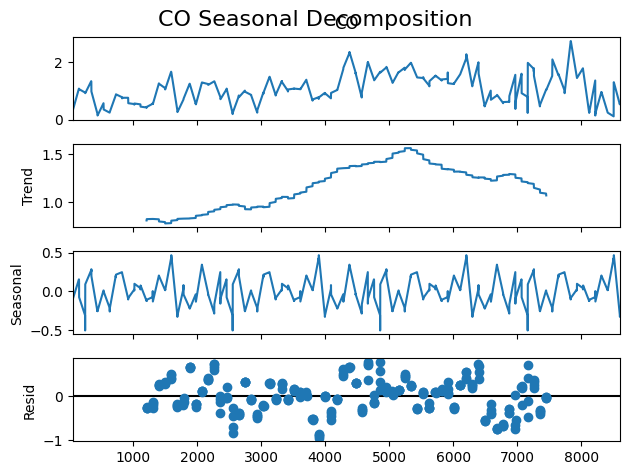

Seasonal Decomposition for SO2


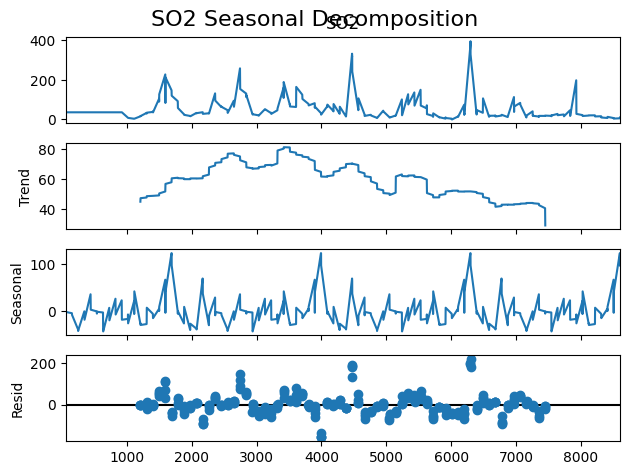

Seasonal Decomposition for NH3


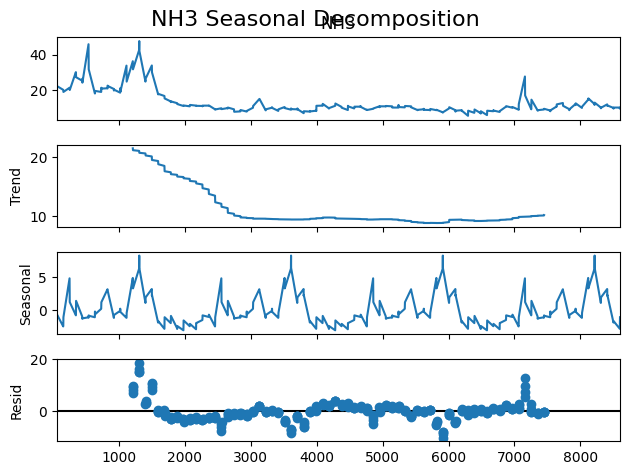

Seasonal Decomposition for Ozone


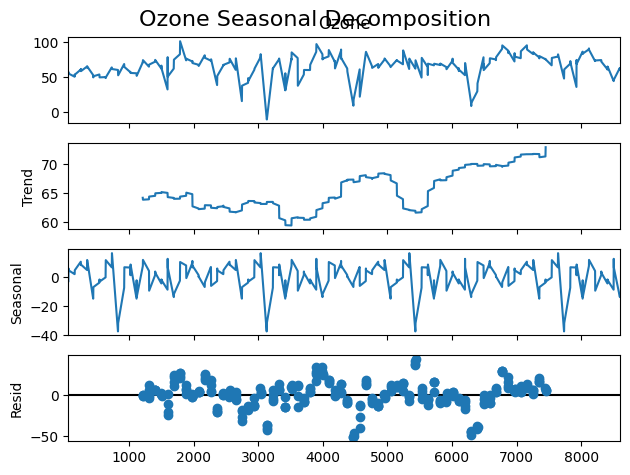

Seasonal Decomposition for Benzene


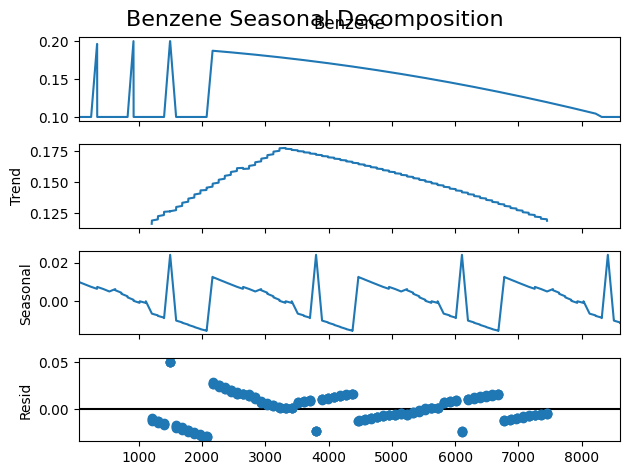

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


# Define the pollutants to analyze
pollutants = ['PM10', 'PM2.5', 'NO', 'NO2', 'NOX', 'CO', 'SO2', 'NH3', 'Ozone', 'Benzene']

# Decompose each pollutant
for pollutant in pollutants:
    print(f"Seasonal Decomposition for {pollutant}")
    try:
        decompose_result = seasonal_decompose(blasting_time_data[pollutant], model='additive', period=96)
        decompose_result.plot()
        plt.suptitle(f"{pollutant} Seasonal Decomposition", fontsize=16)
        plt.show()
    except Exception as e:
        print(f"Could not decompose {pollutant}: {e}")


## From above plots, **Analysis of Seasonal Decomposition for Each Pollutant**

## 1. PM10
- **Observed**:
  - The raw data shows spikes and occasional extreme values.
- **Trend**:
  - A gradual increase in PM10 levels until mid-March, followed by a slow decline into April.
- **Seasonal**:
  - Strong repetitive daily cycles with spikes, likely corresponding to specific activities (e.g., industrial or meteorological effects).
- **Residual**:
  - Shows high variability around the spikes, indicating the presence of unmodeled events.

## 2. PM2.5
- **Observed**:
  - Similar behavior to PM10 but with slightly less pronounced peaks.
- **Trend**:
  - A consistent pattern of increase and decrease similar to PM10 but with smaller amplitude.
- **Seasonal**:
  - Follows a similar daily cyclic pattern, with repeated peaks likely driven by consistent sources.
- **Residual**:
  - Exhibits less extreme noise than PM10 but still shows unexplained variability.

## 3. NO
- **Observed**:
  - Sharp, isolated spikes suggest transient events affecting NO levels.
- **Trend**:
  - A slow decline over the observed period, suggesting reduced NO sources or conditions.
- **Seasonal**:
  - Strong daily cycles with repetitive peaks during specific times.
- **Residual**:
  - Shows notable variability around the seasonal patterns, reflecting unpredicted short-term spikes.

## 4. NO2
- **Observed**:
  - Fluctuations in NO2 levels with consistent patterns.
- **Trend**:
  - A clear increasing trend in late March, stabilizing in April, suggesting potential sustained sources.
- **Seasonal**:
  - High-frequency fluctuations with pronounced daily cycles.
- **Residual**:
  - Moderate noise, reflecting a mix of explained and unexplained variations.

## 5. NOX
- **Observed**:
  - The raw levels are higher than NO or NO2 individually, reflecting cumulative effects.
- **Trend**:
  - A pattern similar to NO2, with a sustained rise until April.
- **Seasonal**:
  - Clear daily cycles with peaks likely driven by traffic or industrial activity.
- **Residual**:
  - Similar to NO2, the noise shows unexplained variability.

---

# **General Observations**

## Seasonality
- All pollutants exhibit clear daily cycles, suggesting consistent external influences (e.g., industrial activity, traffic patterns).

## Trends
- Most pollutants show an increasing trend until mid-March or early April, indicating potential seasonal effects or sustained sources.

## Residuals
- Residual variability indicates the presence of unmodeled factors or external events, such as weather or specific industrial activities.

---

## 6. CO (Carbon Monoxide)
- **Observed**:
  - Moderate fluctuations with consistent patterns, indicating external influences like traffic or industrial emissions.
- **Trend**:
  - A rising trend observed until mid-March, followed by a gradual decline.
  - Likely driven by seasonal variations or reduced emissions.
- **Seasonal**:
  - Repetitive daily cycles, suggesting periodic emissions or activities influencing CO levels.
- **Residual**:
  - Moderate noise, indicating some unexplained short-term variations.

## 7. SO2 (Sulfur Dioxide)
- **Observed**:
  - High spikes with significant variability, suggesting episodic industrial activities or weather conditions.
- **Trend**:
  - Gradual increase until mid-March and slight reduction in April.
- **Seasonal**:
  - Clear periodic patterns with sharp peaks, indicating regular emissions or specific seasonal activities.
- **Residual**:
  - High variability during the spikes, reflecting unmodeled events.

## 8. NH3 (Ammonia)
- **Observed**:
  - Initially high levels with significant fluctuations, followed by stabilization and a slight rise in April.
- **Trend**:
  - A declining trend over February and March, with a slight increase in April.
- **Seasonal**:
  - Regular daily cycles, likely due to agricultural or industrial emissions.
- **Residual**:
  - Lower noise compared to other pollutants, suggesting fewer unmodeled factors.

## 9. Ozone
- **Observed**:
  - Moderate variability with no extreme spikes.
- **Trend**:
  - A steady upward trend, especially noticeable in April, possibly linked to warmer weather.
- **Seasonal**:
  - Repeated daily fluctuations, likely influenced by sunlight and temperature (photochemical reactions).
- **Residual**:
  - Moderate noise, with no significant outliers.

## 10. Benzene
- **Observed**:
  - Very low levels overall, with occasional spikes.
- **Trend**:
  - A rising trend until mid-March, followed by a decline in April.
- **Seasonal**:
  - Strong, periodic patterns suggesting consistent emissions from specific sources (e.g., industrial or vehicular).
- **Residual**:
  - Minimal noise, reflecting stable and predictable benzene levels.

---

# **General Observations Across All Pollutants**

## Seasonality
- Most pollutants exhibit clear daily or periodic patterns, influenced by regular activities like industrial operations, traffic, or weather conditions.

## Trends
- Rising trends for most pollutants during February to mid-March, likely influenced by seasonal factors.
- Declining trends for some pollutants (e.g., CO, SO2, Benzene) in April, possibly due to reduced emissions or better atmospheric conditions.

## Residuals
- Residual variability indicates unexplained factors or external events (e.g., weather, specific industrial activities).


# Explanatory Analysis
Correlation Analysis

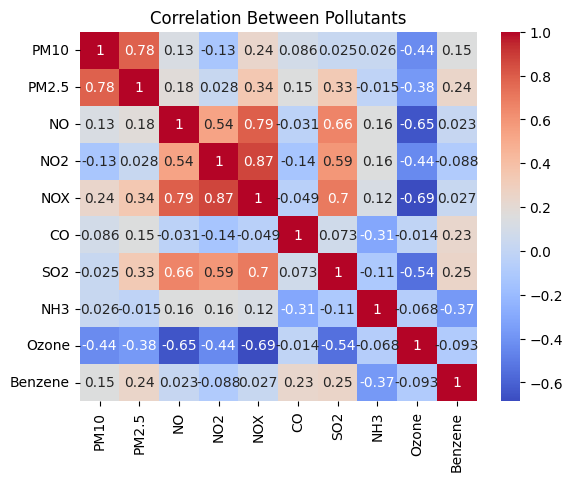

In [62]:
import seaborn as sns

# Correlation between pollutants
correlation_matrix = blasting_time_data[pollutant_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Between Pollutants")
plt.show()


## Compare Pollutant Levels During and Outside Blasting Time


In [63]:
# Create a blasting flag
data['is_blasting'] = ((data['from'].dt.time >= pd.to_datetime('13:45').time()) &
                       (data['to'].dt.time <= pd.to_datetime('14:45').time()))

# Group by blasting vs. non-blasting
comparison = data.groupby('is_blasting')[pollutant_columns].mean()
print("Comparison of Pollutant Levels (Blasting vs Non-Blasting):")
comparison




Comparison of Pollutant Levels (Blasting vs Non-Blasting):


PM10      PM2.5         NO        NO2        NOX        CO  \
is_blasting                                                                     
False        199.385042  78.584399  14.753863  55.551041  43.007181  1.421328   
True         159.071910  48.519729   8.502386  50.013433  33.881648  1.154387   

                   SO2        NH3      Ozone   Benzene  
is_blasting                                             
False        35.045002  13.325432  33.107132  0.161061  
True         46.087412  12.866180  55.643868  0.145471

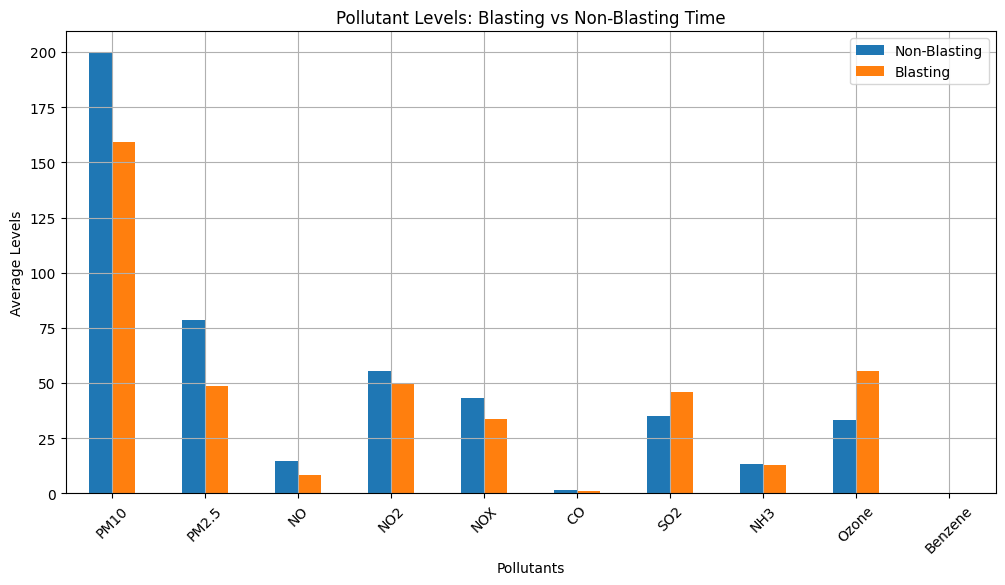

In [64]:
# Plot the comparison
comparison.T.plot(kind='bar', figsize=(12, 6))
plt.title("Pollutant Levels: Blasting vs Non-Blasting Time")
plt.ylabel("Average Levels")
plt.xlabel("Pollutants")
plt.xticks(rotation=45)
plt.legend(["Non-Blasting", "Blasting"])
plt.grid()
plt.show()

# Trend and Seasonality Over a Single Day(Half-Hour Trends and Seasonality)

In [65]:
# Extract the hour from the 'from' timestamp
data['hour'] = data['from'].dt.hour

# Group by hour and calculate the mean for each pollutant
daily_trends = data.groupby('hour')[['PM10', 'PM2.5', 'NO', 'NO2', 'NOX', 'CO', 'SO2', 'NH3', 'Ozone', 'Benzene']].mean()

# Display the daily trends
print("Daily Trends (Hourly Averages):")
daily_trends


Daily Trends (Hourly Averages):


PM10       PM2.5         NO        NO2        NOX        CO  \
hour                                                                      
0     212.403738   91.415876  16.777615  59.413630  47.982036  1.615370   
1     214.603226   93.247085  20.187628  59.464097  50.875873  1.586989   
2     225.055203   91.991599  22.234754  59.155041  52.476803  1.597947   
3     209.608538   89.282895  24.790593  58.372748  54.002978  1.563234   
4     209.290727   85.660800  25.805449  57.403371  53.974743  1.559881   
5     203.223736   86.731621  27.662811  56.440028  55.041171  1.606996   
6     204.402602  105.948195  32.581931  56.591971  59.351624  1.735364   
7     223.073683  136.107745  29.797805  59.162619  58.605186  1.737896   
8     251.734033  130.086417  16.310154  61.933916  48.796024  1.484409   
9     249.663146   90.845821   9.555924  57.050308  39.709971  1.343883   
10    214.754959   63.021871   7.288976  53.212874  34.907471  1.412116   
11    179.831375   48.517697   7.618569  50.750792  33.069613  1.117449   
12    159.153652   42.495074   7.633704  49.391481  32.101907  1.088878   
13    147.373669   40.413200   7.232885  49.040979  31.735088  1.106507   
14    144.336727   37.805005   6.559920  47.108882  30.191515  1.087457   
15    143.381102   36.847578   5.932881  45.955045  29.109293  1.054707   
16    140.965685   37.520162   5.473677  44.912900  28.213784  1.063739   
17    138.287275   43.023878   5.256271  43.833742  27.408846  1.096001   
18    149.905095   55.847245   5.638821  48.430946  30.285409  1.283029   
19    180.894266   86.798070   8.333061  58.110454  38.117247  1.474317   
20    243.914953   99.034697  11.475338  63.761813  44.362763  1.472542   
21    263.384097   83.612251  12.887423  64.125720  46.468465  1.516215   
22    220.130991   84.227551  13.794039  62.126388  46.631721  1.592611   
23    205.477120   87.962416  15.448145  60.553224  47.345895  1.580658   

            SO2        NH3      Ozone   Benzene  
hour                                             
0     23.850719  13.242706  13.909469  0.172976  
1     23.335498  13.144122  11.364625  0.175159  
2     23.889096  13.384346  10.678264  0.175399  
3     23.802160  13.492114  11.047365  0.174736  
4     24.021525  13.441159  10.419925  0.170739  
5     24.141119  13.413610   8.878498  0.170145  
6     24.677088  13.552445   8.332992  0.168717  
7     27.310285  14.169461  13.961458  0.177011  
8     28.701227  14.131323  31.734691  0.180028  
9     35.302799  14.330533  48.592774  0.174711  
10    55.953387  14.202264  56.899682  0.164699  
11    76.752542  14.189373  59.019143  0.152483  
12    71.051959  13.588048  61.282398  0.145499  
13    61.727031  12.825946  62.928634  0.141253  
14    49.753020  12.780036  66.203283  0.139276  
15    44.463595  12.909028  66.387459  0.139989  
16    40.837219  12.826763  63.969927  0.140040  
17    32.778680  12.507544  58.306178  0.138797  
18    29.036404  12.501821  41.071988  0.140475  
19    29.068986  12.766874  28.987133  0.151260  
20    27.738863  12.919253  26.103330  0.158442  
21    27.008535  12.983573  23.788361  0.160869  
22    25.632448  12.905518  21.395889  0.165553  
23    24.048871  13.028449  17.478617  0.167730

In [66]:
# Set 'from' as the datetime index for resampling
data.set_index('from', inplace=True)

# Resample the data into 30-minute intervals and compute mean for each pollutant
half_hour_data = data.resample('30T').mean()

# Reset index after resampling
half_hour_data.reset_index(inplace=True)



<ipython-input-66-204b6d24adca>:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  half_hour_data = data.resample('30T').mean()


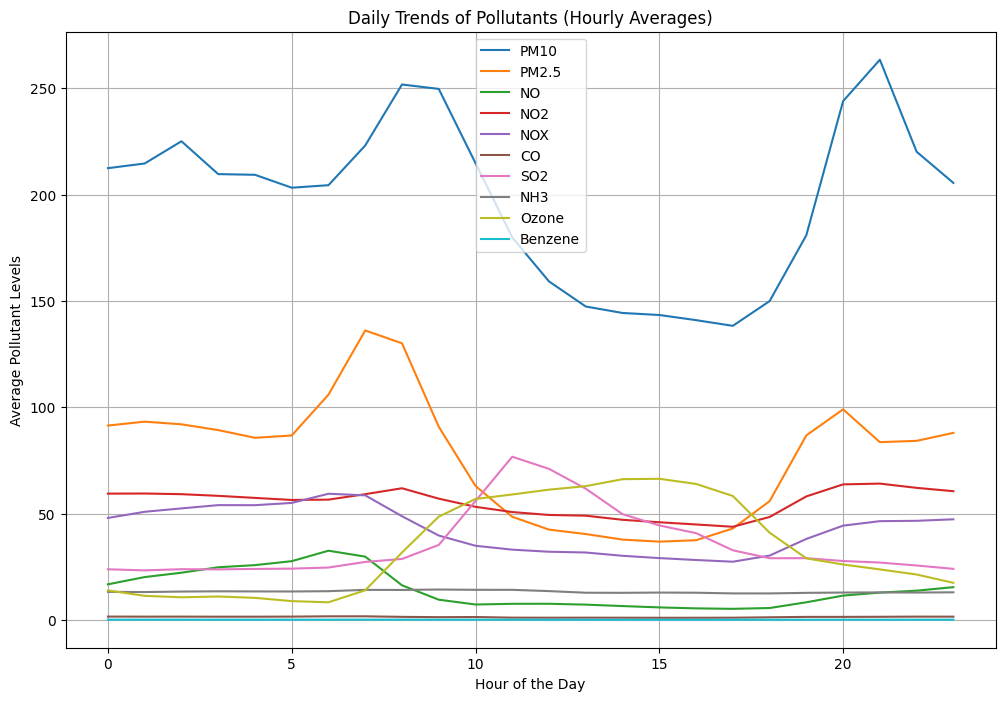

In [67]:
import matplotlib.pyplot as plt

# Plot each pollutant's daily trend
pollutants = ['PM10', 'PM2.5', 'NO', 'NO2', 'NOX', 'CO', 'SO2', 'NH3', 'Ozone', 'Benzene']

plt.figure(figsize=(12, 8))
for pollutant in pollutants:
    plt.plot(daily_trends.index, daily_trends[pollutant], label=pollutant)

plt.title('Daily Trends of Pollutants (Hourly Averages)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Pollutant Levels')
plt.legend()
plt.grid()
plt.show()


In [68]:
# Display the half-hourly data
print("Half-Hourly Aggregated Data:")
half_hour_data.head()

Half-Hourly Aggregated Data:


from                  to   PM10  PM2.5         NO    NO2  \
0 2023-02-01 00:00:00 2023-02-01 00:22:30   95.0   35.0  14.428266  89.05   
1 2023-02-01 00:30:00 2023-02-01 00:52:30  108.5   34.5  14.428266  88.30   
2 2023-02-01 01:00:00 2023-02-01 01:22:30  122.0   34.0  14.428266  90.10   
3 2023-02-01 01:30:00 2023-02-01 01:52:30  106.0   34.5  14.428266  88.90   
4 2023-02-01 02:00:00 2023-02-01 02:22:30   90.0   35.0  14.428266  88.90   

     NOX     CO        SO2   NH3  Ozone  Benzene  is_blasting  hour  
0  55.65  0.320  35.620127  18.0   27.6      0.4          0.0   0.0  
1  55.45  0.380  35.620127  20.5   23.4      0.4          0.0   0.0  
2  55.85  0.375  35.620127  22.5   16.4      0.4          0.0   1.0  
3  55.30  0.345  35.620127  23.3   21.5      0.4          0.0   1.0  
4  55.60  0.345  35.620127  23.0   20.9      0.4          0.0   2.0

In [69]:
# Extract time (hour and minute) for grouping
half_hour_data['time'] = half_hour_data['from'].dt.time

# Group by time (e.g., 00:00, 00:30, etc.) across multiple days and calculate mean
half_hour_trends = half_hour_data.groupby('time')[['PM10', 'PM2.5', 'NO', 'NO2', 'NOX', 'CO', 'SO2', 'NH3', 'Ozone', 'Benzene']].mean()




In [70]:
# Display half-hour trends
print("Half-Hourly Trends Across Days:")
half_hour_trends

Half-Hourly Trends Across Days:


PM10       PM2.5         NO        NO2        NOX        CO  \
time                                                                          
00:00:00  211.655503   90.786256  16.167561  59.601809  47.538830  1.637095   
00:30:00  213.151973   92.045496  17.387669  59.225451  48.425242  1.593645   
01:00:00  212.517707   93.442640  19.505451  59.455273  50.295237  1.581374   
01:30:00  216.688745   93.051530  20.869804  59.472921  51.456509  1.592603   
02:00:00  229.552515   92.563164  21.776284  59.458393  52.272391  1.610665   
02:30:00  220.557892   91.420034  22.693224  58.851690  52.681216  1.585228   
03:00:00  208.623370   90.263189  24.078956  58.631700  53.637985  1.569679   
03:30:00  210.593706   88.302601  25.502229  58.113796  54.367972  1.556790   
04:00:00  211.024688   86.374856  26.070048  57.798946  54.473587  1.552688   
04:30:00  207.556765   84.946745  25.540851  57.007796  53.475900  1.567075   
05:00:00  204.345492   83.512710  26.645229  56.581499  54.231516  1.585023   
05:30:00  202.101980   89.950531  28.680393  56.298558  55.850827  1.628970   
06:00:00  200.526229   96.382429  31.323564  56.479529  58.223275  1.702418   
06:30:00  208.278975  115.513960  33.840299  56.704413  60.479973  1.768311   
07:00:00  212.761344  134.639568  32.488930  57.936542  60.119810  1.789814   
07:30:00  233.386022  137.575921  27.106680  60.388695  57.090563  1.685977   
08:00:00  250.734170  140.506350  19.162438  62.653094  51.723343  1.526416   
08:30:00  252.733897  119.666484  13.457871  61.214738  45.868706  1.442403   
09:00:00  255.992590   98.820540  10.481866  58.151406  41.303318  1.351573   
09:30:00  243.333701   82.871102   8.629981  55.949209  38.116624  1.336193   
10:00:00  224.456953   66.901469   7.688830  54.094929  35.897805  1.680119   
10:30:00  205.052966   59.142273   6.889122  52.330819  33.917137  1.144112   
11:00:00  184.248473   50.503027   7.568724  50.728313  33.200374  1.128912   
11:30:00  175.414276   46.532367   7.668415  50.773272  32.938852  1.105987   
12:00:00  162.567290   43.175417   7.239780  49.812000  31.921444  1.091927   
12:30:00  155.740015   41.814732   8.027628  48.970961  32.282369  1.085828   
13:00:00  149.169575   41.068762   7.446797  49.548927  32.175228  1.107999   
13:30:00  145.577763   39.757637   7.018973  48.533030  31.294947  1.105015   
14:00:00  146.055976   38.027520   6.664713  47.558822  30.511499  1.085450   
14:30:00  142.617479   37.582490   6.455127  46.658942  29.871532  1.089464   
15:00:00  143.159144   37.126677   6.061667  46.350428  29.413860  1.053740   
15:30:00  143.603059   36.568479   5.804094  45.559663  28.804726  1.055674   
16:00:00  141.750239   36.192799   5.519703  45.223898  28.443971  1.046956   
16:30:00  140.181132   38.847525   5.427651  44.601901  27.983597  1.080522   
17:00:00  135.712460   41.634752   5.267331  43.685854  27.323635  1.070351   
17:30:00  140.862089   44.413003   5.245211  43.981630  27.494056  1.121651   
18:00:00  147.337990   47.305530   5.378145  46.339889  28.891343  1.207444   
18:30:00  152.472200   64.388960   5.899498  50.522003  31.679474  1.358614   
19:00:00  164.529266   81.020387   7.254204  55.916363  35.916855  1.460450   
19:30:00  197.259266   92.575754   9.411918  60.304545  40.317639  1.488184   
20:00:00  236.659776  104.131476  11.082084  63.339598  43.624921  1.459624   
20:30:00  251.170129   93.937918  11.868591  64.184028  45.100605  1.485460   
21:00:00  269.629277   83.729770  12.889217  64.316259  46.408873  1.496908   
21:30:00  257.138916   83.494732  12.885629  63.935181  46.528057  1.535523   
22:00:00  228.563679   83.253771  13.314493  62.710237  46.492046  1.559581   
22:30:00  211.698303   85.201332  14.273586  61.542539  46.771395  1.625640   
23:00:00  200.044580   87.142970  15.180688  60.931682  47.281661  1.640482   
23:30:00  210.909660   88.781863  15.715602  60.174766  47.410130  1.520834   

                SO2        NH3      Ozone   Benzene  
time       

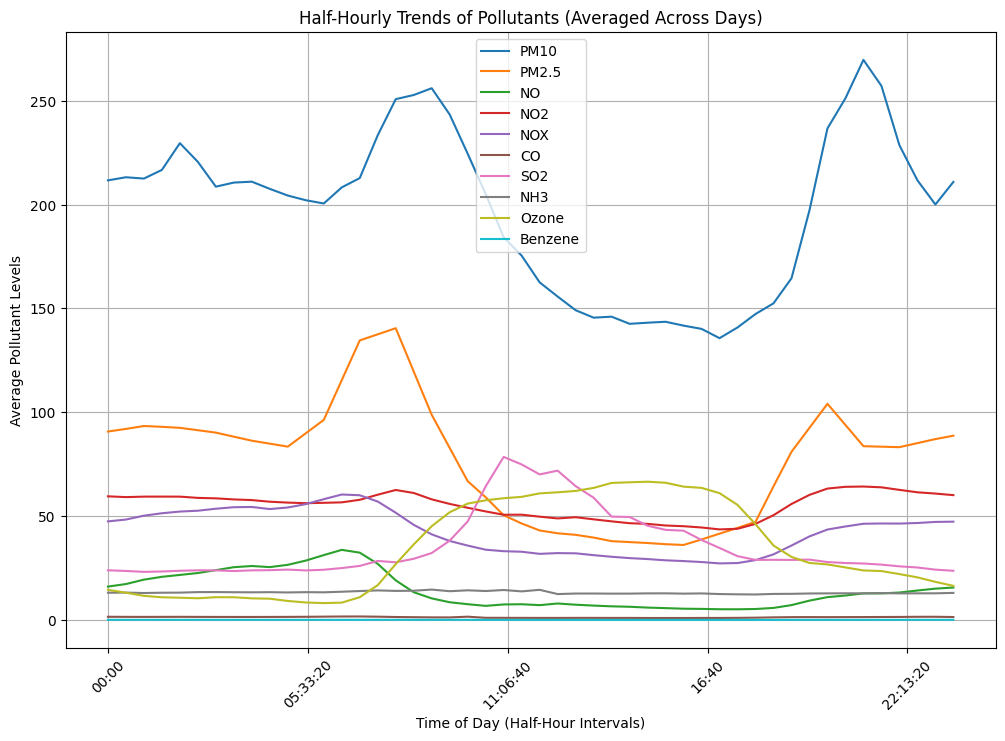

In [71]:
import matplotlib.pyplot as plt

# Plot each pollutant's half-hourly trend
plt.figure(figsize=(12, 8))
for pollutant in half_hour_trends.columns:
    plt.plot(half_hour_trends.index, half_hour_trends[pollutant], label=pollutant)

plt.title('Half-Hourly Trends of Pollutants (Averaged Across Days)')
plt.xlabel('Time of Day (Half-Hour Intervals)')
plt.ylabel('Average Pollutant Levels')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


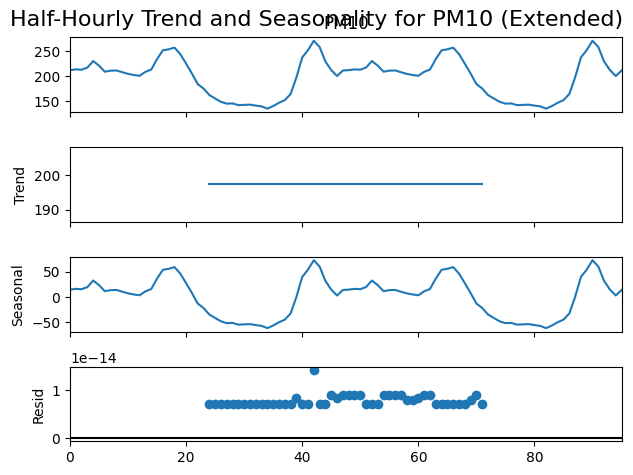

In [72]:
# Repeat half-hour trends for 2 cycles (simulate 2 days)
extended_trends = pd.concat([half_hour_trends] * 2, ignore_index=True)

# Decompose the extended trend for PM10
decompose_result = seasonal_decompose(extended_trends['PM10'], model='additive', period=48)

# Plot the decomposition
decompose_result.plot()
plt.suptitle('Half-Hourly Trend and Seasonality for PM10 (Extended)', fontsize=16)
plt.show()


Seasonal Decomposition for PM10


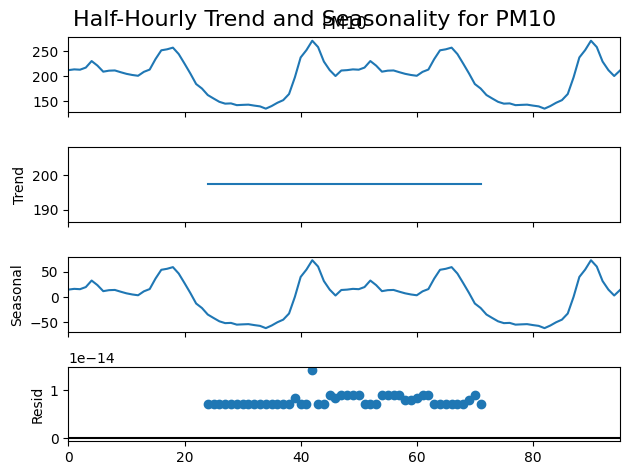

Seasonal Decomposition for PM2.5


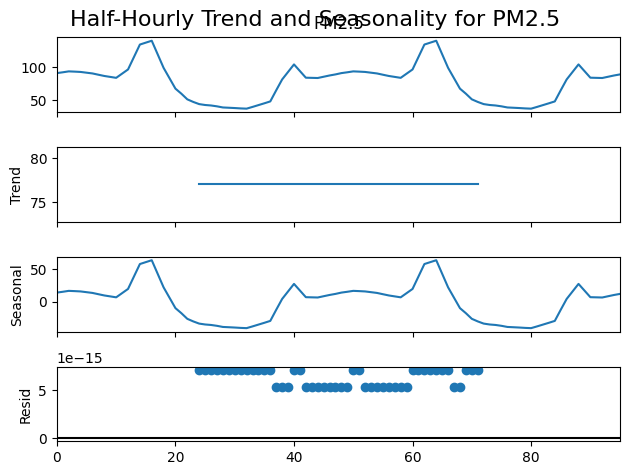

Seasonal Decomposition for NO


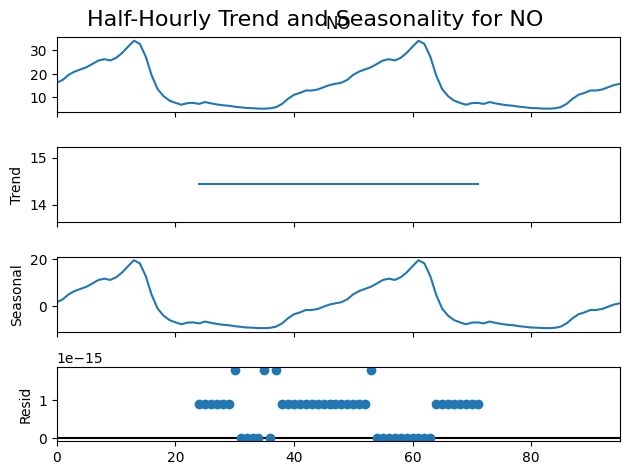

Seasonal Decomposition for NO2


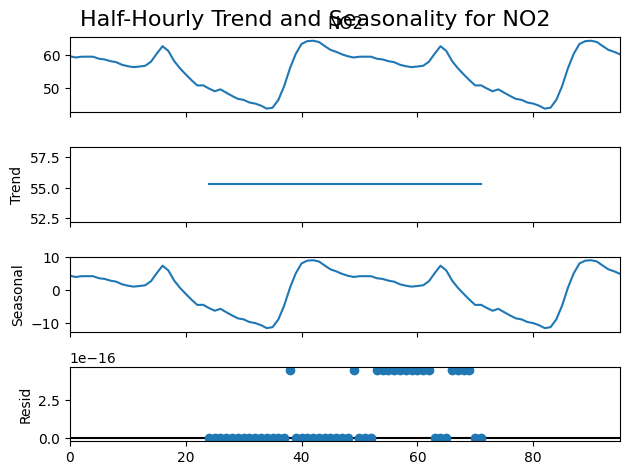

Seasonal Decomposition for NOX


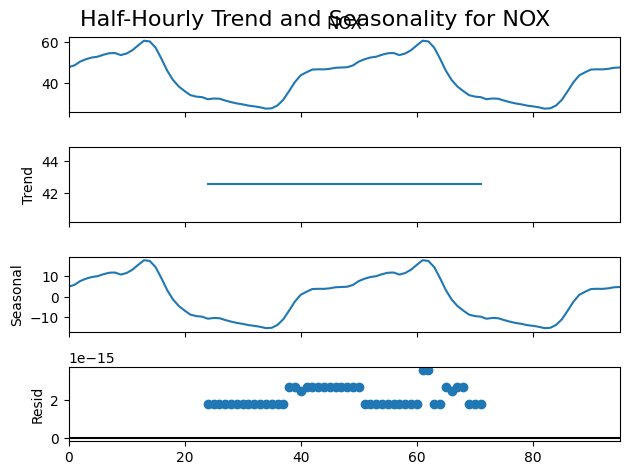

Seasonal Decomposition for CO


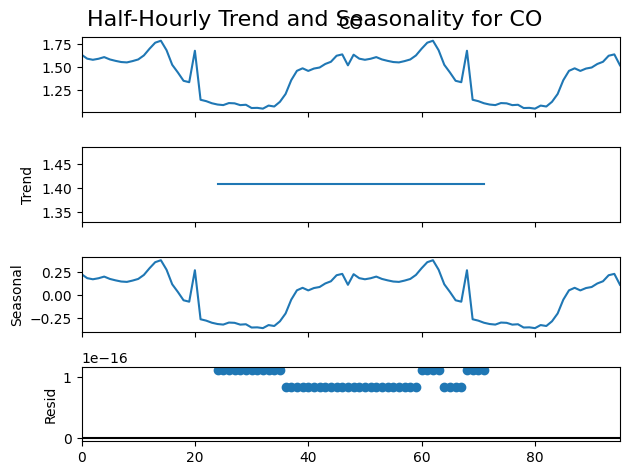

Seasonal Decomposition for SO2


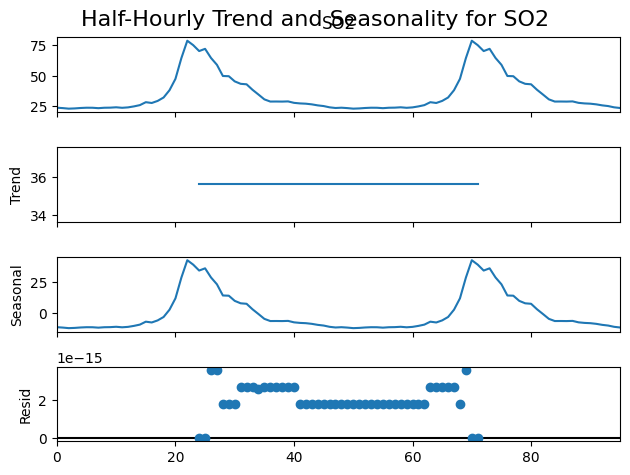

Seasonal Decomposition for NH3


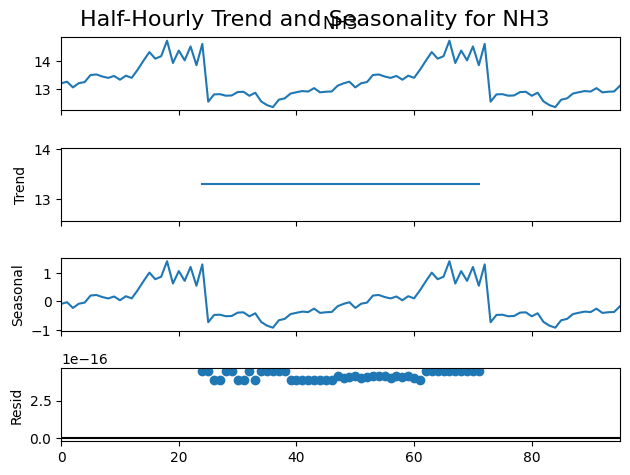

Seasonal Decomposition for Ozone


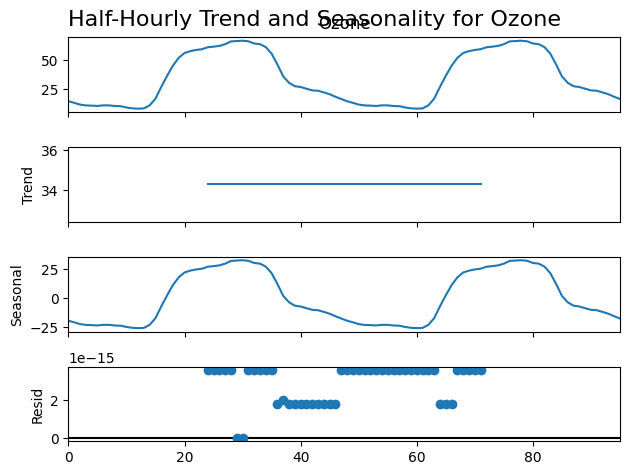

Seasonal Decomposition for Benzene


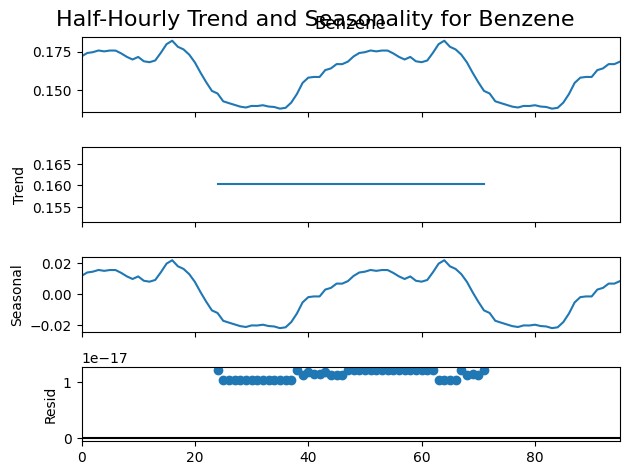

In [73]:
# Ensure 'half_hour_trends' DataFrame is aggregated properly
if 'extended_trends' in locals():
    # List of pollutants to analyze
    pollutants = ['PM10', 'PM2.5', 'NO', 'NO2', 'NOX', 'CO', 'SO2', 'NH3', 'Ozone', 'Benzene']

    # Perform seasonal decomposition for each pollutant
    for pollutant in pollutants:
        try:
            print(f"Seasonal Decomposition for {pollutant}")
            decompose_result = seasonal_decompose(extended_trends[pollutant], model='additive', period=48)
            decompose_result.plot()
            plt.suptitle(f'Half-Hourly Trend and Seasonality for {pollutant}', fontsize=16)
            plt.show()
        except Exception as e:
            print(f"Could not decompose {pollutant}: {e}")
else:
    print("Error: 'half_hour_trends' not found. Please ensure it is created properly.")


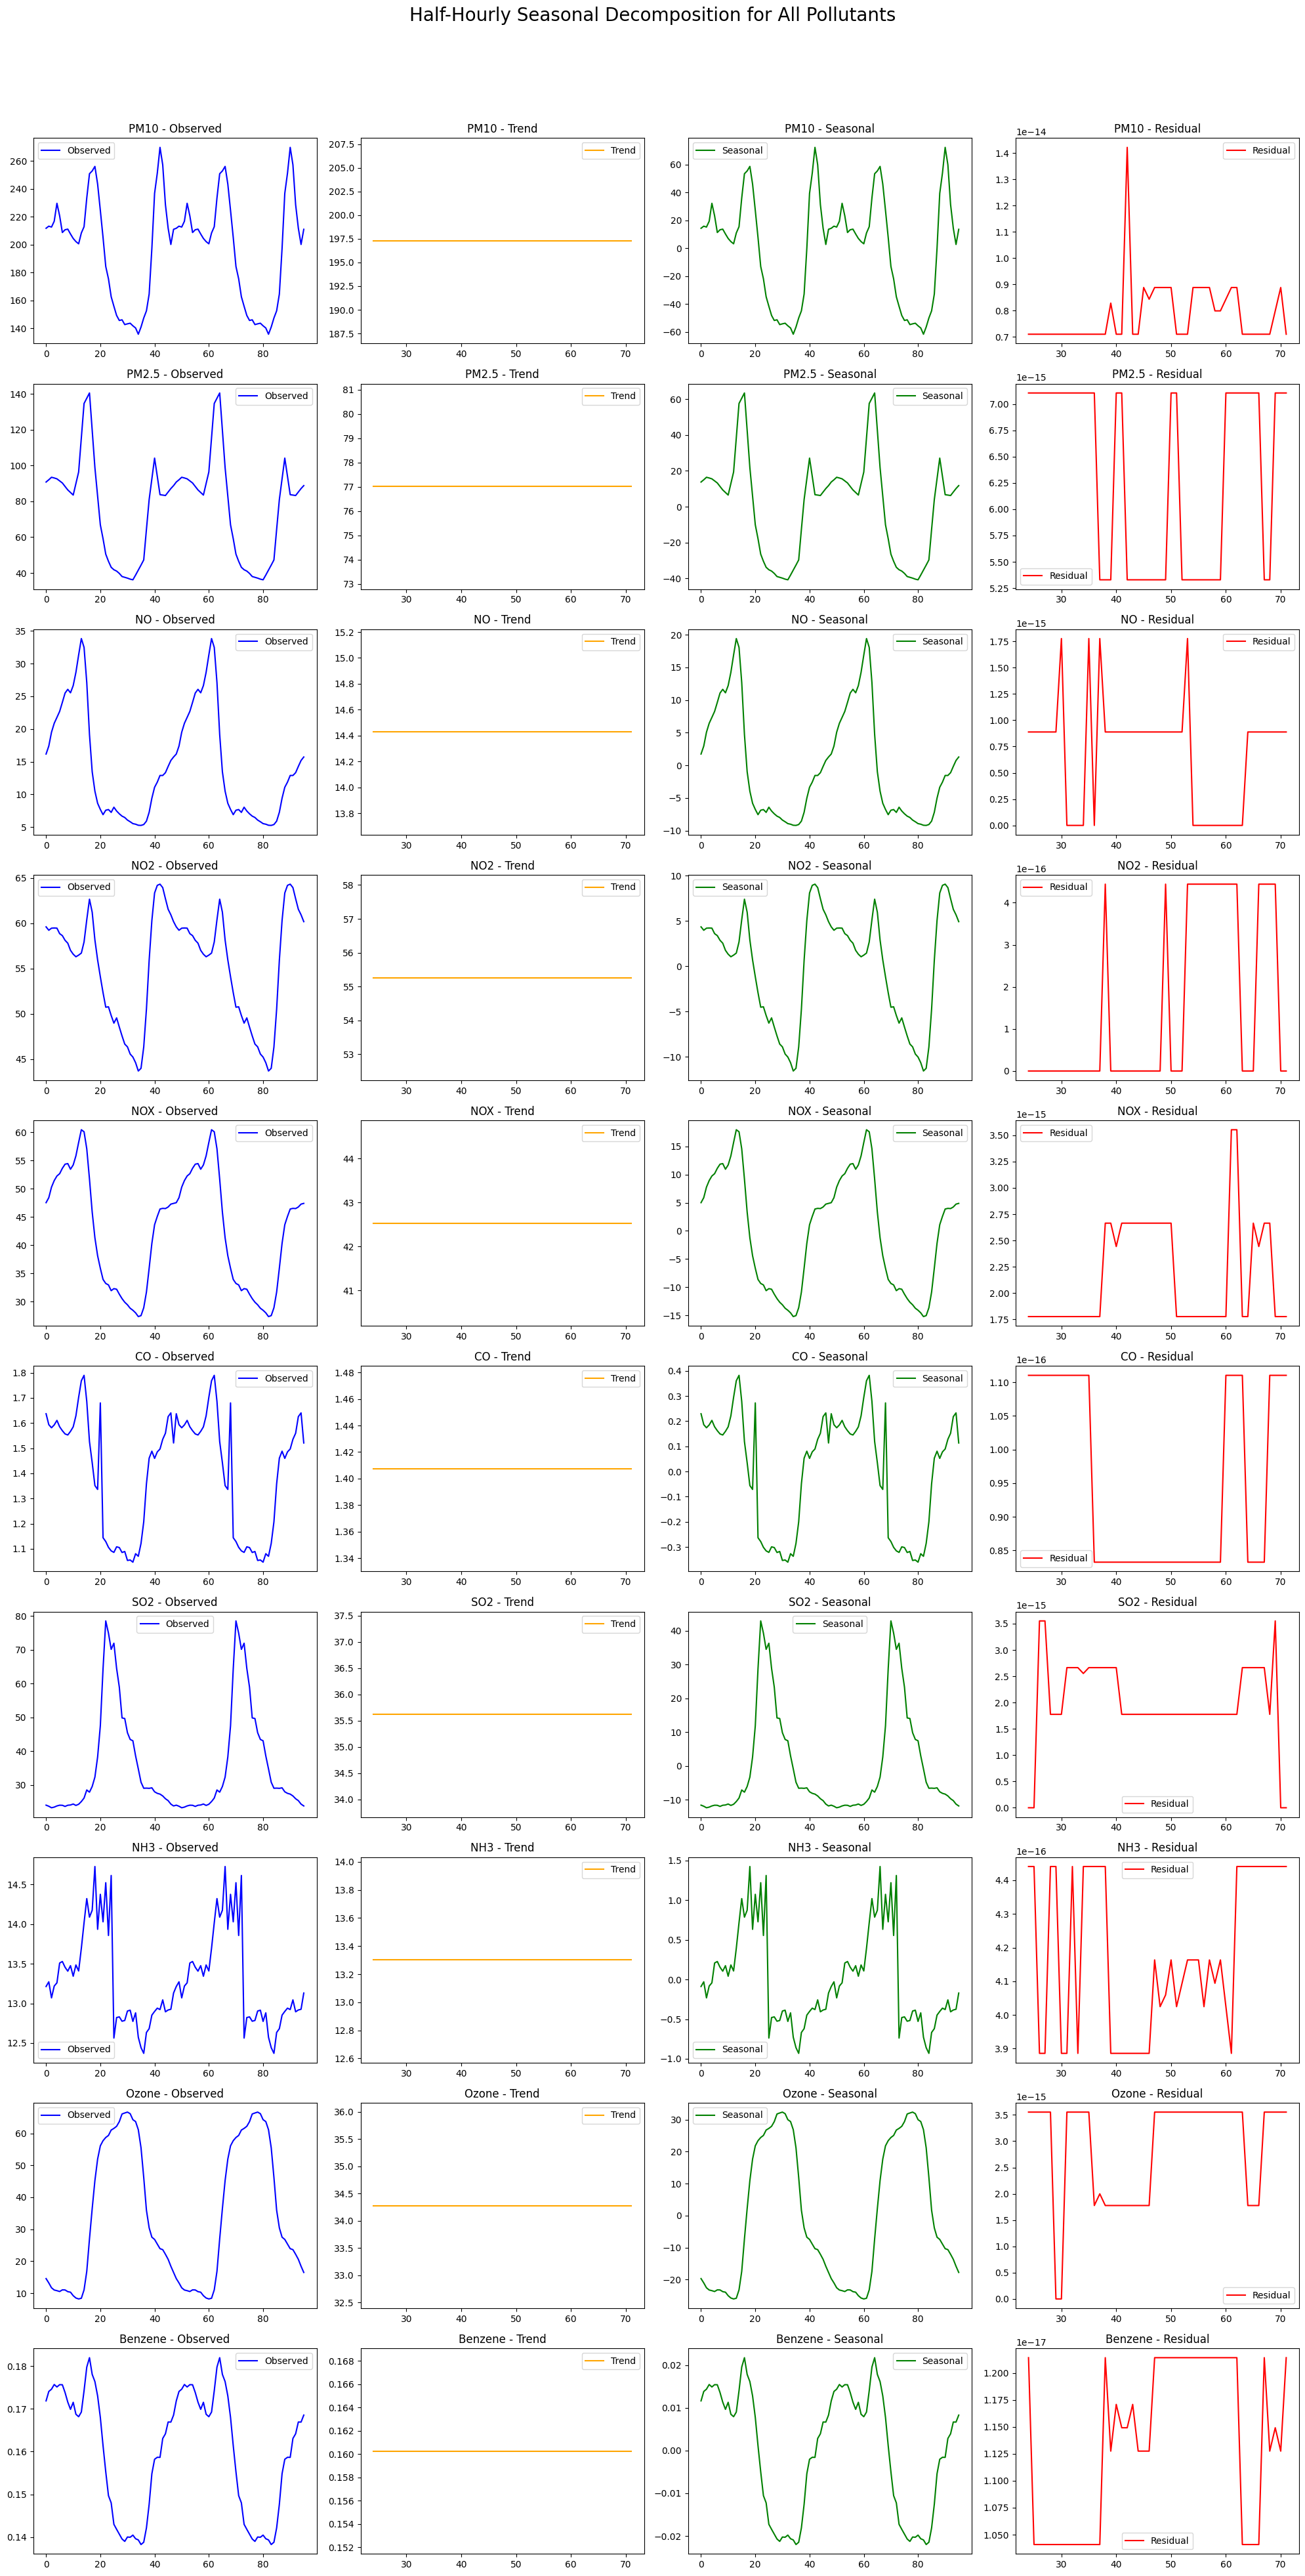

In [75]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Repeat half-hour trends for 2 cycles (simulate 2 days)
extended_trends = pd.concat([half_hour_trends] * 2, ignore_index=True)

# Ensure 'extended_trends' is valid
if 'extended_trends' in locals():
    # List of pollutants to analyze
    pollutants = ['PM10', 'PM2.5', 'NO', 'NO2', 'NOX', 'CO', 'SO2', 'NH3', 'Ozone', 'Benzene']

    # Create a grid layout for all pollutants
    num_pollutants = len(pollutants)
    fig, axes = plt.subplots(num_pollutants, 4, figsize=(20, 4 * num_pollutants))
    fig.suptitle('Half-Hourly Seasonal Decomposition for All Pollutants', fontsize=20)

    # Loop through each pollutant for decomposition
    for i, pollutant in enumerate(pollutants):
        try:
            # Perform seasonal decomposition
            decompose_result = seasonal_decompose(extended_trends[pollutant], model='additive', period=48)

            # Plot Observed
            axes[i, 0].plot(decompose_result.observed, label='Observed', color='blue')
            axes[i, 0].set_title(f'{pollutant} - Observed')
            axes[i, 0].legend()



            # Plot Trend
            axes[i, 1].plot(decompose_result.trend, label='Trend', color='orange')
            axes[i, 1].set_title(f'{pollutant} - Trend')
            axes[i, 1].legend()


            # Plot Seasonal
            axes[i, 2].plot(decompose_result.seasonal, label='Seasonal', color='green')
            axes[i, 2].set_title(f'{pollutant} - Seasonal')
            axes[i, 2].legend()


            # Plot Residual
            axes[i, 3].plot(decompose_result.resid, label='Residual', color='red')
            axes[i, 3].set_title(f'{pollutant} - Residual')
            axes[i, 3].legend()


        except Exception as e:
            print(f"Could not decompose {pollutant}: {e}")
            for j in range(4):  # Clear grid space for failed pollutant
                axes[i, j].set_visible(False)

    # Adjust layout to prevent overlap
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

else:
    print("Error: 'half_hour_trends' or 'extended_trends' is not properly defined.")


# Trends and Seasonality Analysis on Daily Averaged Data

**Methodology**
Aggregate Data:

1. Compute the mean pollutant levels for each half-hour interval across all days.
Decompose the Averaged Data:

2. Use seasonal decomposition to analyze trends, seasonality, and residuals for each pollutant based on the averaged data.

In [77]:
data.head()

to   PM10  PM2.5         NO   NO2   NOX  \
from                                                                           
2023-02-01 00:00:00 2023-02-01 00:15:00   95.0   35.0  14.428266  90.1  56.2   
2023-02-01 00:15:00 2023-02-01 00:30:00   95.0   35.0  14.428266  88.0  55.1   
2023-02-01 00:30:00 2023-02-01 00:45:00   95.0   35.0  14.428266  87.7  55.2   
2023-02-01 00:45:00 2023-02-01 01:00:00  122.0   34.0  14.428266  88.9  55.7   
2023-02-01 01:00:00 2023-02-01 01:15:00  122.0   34.0  14.428266  90.0  55.8   

                       CO        SO2   NH3  Ozone  Benzene  is_blasting  hour  
from                                                                           
2023-02-01 00:00:00  0.31  35.620127  17.7   28.1      0.4        False     0  
2023-02-01 00:15:00  0.33  35.620127  18.3   27.1      0.4        False     0  
2023-02-01 00:30:00  0.38  35.620127  19.7   24.9      0.4        False     0  
2023-02-01 00:45:00  0.38  35.620127  21.3   21.9      0.4        False     0  
2023-02-01 01:00:00  0.38  35.620127  22.3   16.7      0.4        False     1

In [81]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Copy the data
data2 = data.copy()

# Resample to half-hour intervals and compute the average for pollutants
data2['time'] = data2.index.time  # Extract time component
half_hour_avg = data2.groupby('time')[['PM10', 'PM2.5', 'NO', 'NO2', 'NOX', 'CO', 'SO2', 'NH3', 'Ozone', 'Benzene']].mean()

# Reset index for decomposition
half_hour_avg.reset_index(inplace=True)

# Display the averaged data
print("Half-Hourly Averaged Data Across All Days:")
half_hour_avg



Half-Hourly Averaged Data Across All Days:


time        PM10      PM2.5         NO        NO2        NOX  \
0   00:00:00  212.041174  90.814270  15.974392  59.759615  47.452705   
1   00:15:00  211.269832  90.758241  16.360731  59.444002  47.624955   
2   00:30:00  211.460998  90.781624  16.980087  59.189945  48.067139   
3   00:45:00  214.842947  93.309369  17.795252  59.260956  48.783345   
4   01:00:00  212.883116  93.402126  19.118309  59.195590  49.834731   
..       ...         ...        ...        ...        ...        ...   
91  22:45:00  200.504943  87.216648  14.513250  61.314298  46.864194   
92  23:00:00  198.472526  87.168023  15.002634  61.022706  47.150716   
93  23:15:00  201.616633  87.117917  15.358742  60.840658  47.412606   
94  23:30:00  211.949090  87.066330  15.631574  60.384610  47.426530   
95  23:45:00  209.870230  90.497396  15.799630  59.964923  47.393729   

          CO        SO2        NH3      Ozone   Benzene  
0   1.657761  24.058618  13.183645  14.833164  0.172435  
1   1.616429  23.962919  13.242570  14.337100  0.171314  
2   1.600699  23.826683  13.284919  13.689612  0.172415  
3   1.586591  23.554655  13.259689  12.777999  0.175739  
4   1.578261  23.378920  13.074405  12.026138  0.174618  
..       ...        ...        ...        ...       ...  
91  1.634752  25.118540  12.928619  20.600270  0.166927  
92  1.638260  24.535995  12.907678  19.150505  0.166918  
93  1.642704  24.107708  12.944488  17.743633  0.166908  
94  1.631036  24.192568  13.111271  17.151673  0.168009  
95  1.410631  23.359213  13.150359  15.868655  0.169085  

[96 rows x 11 columns]

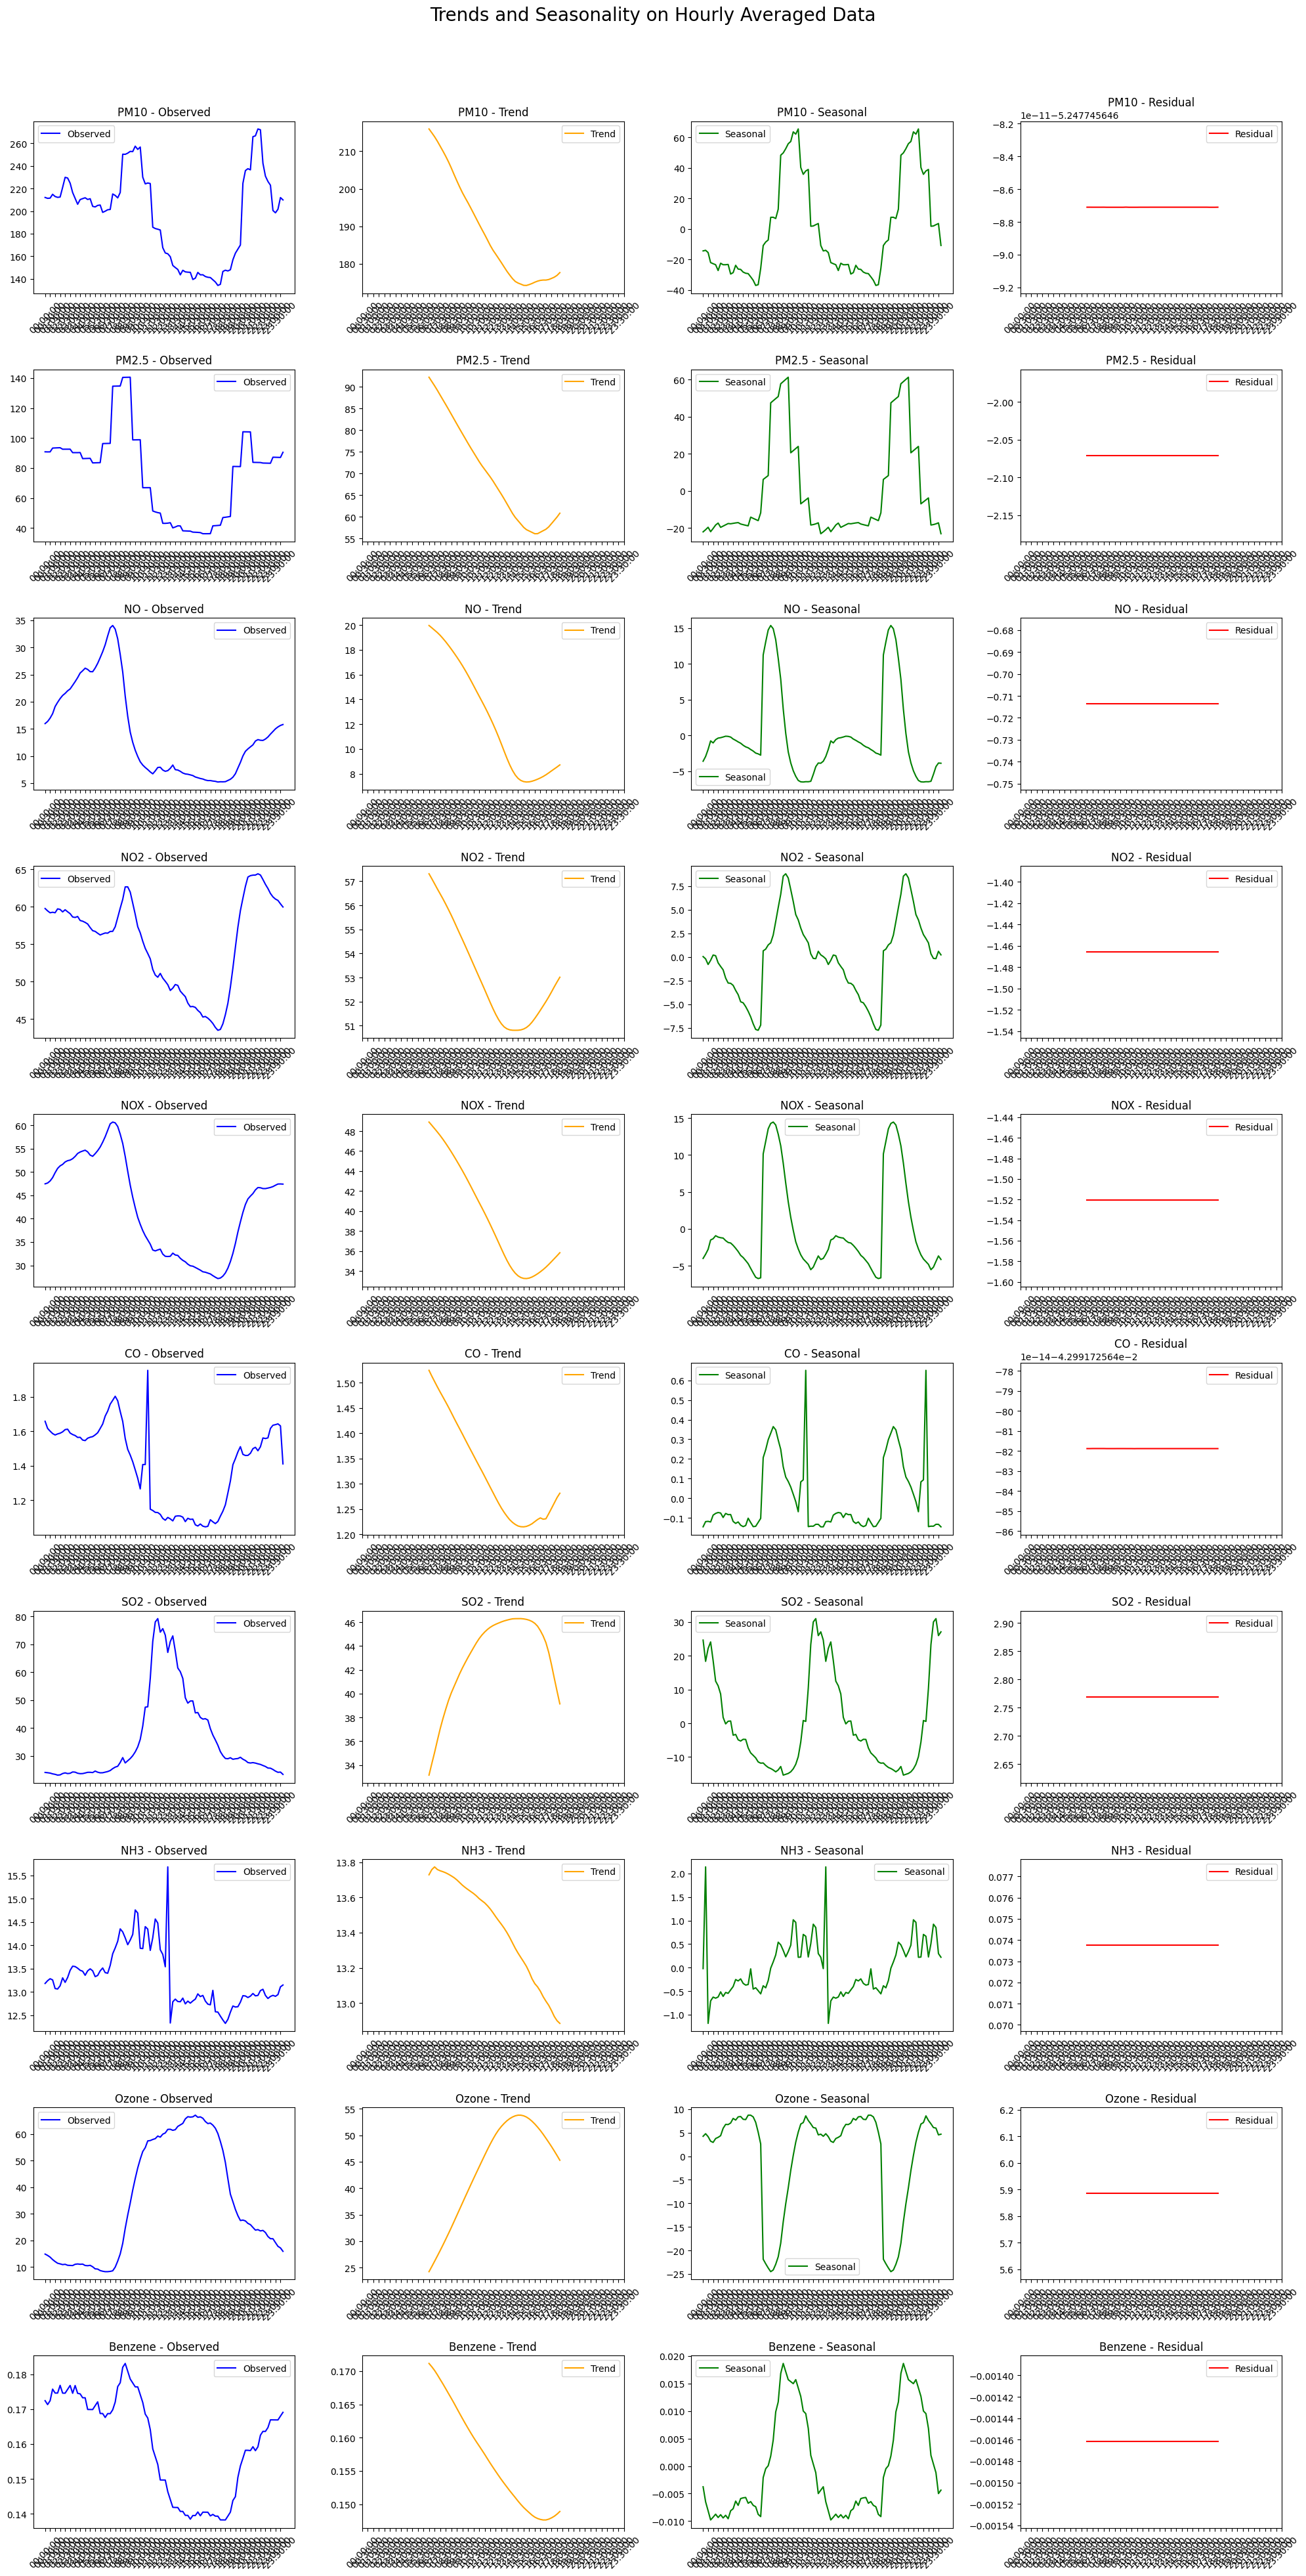

In [83]:
# Decompose and analyze trends and seasonality
pollutants = ['PM10', 'PM2.5', 'NO', 'NO2', 'NOX', 'CO', 'SO2', 'NH3', 'Ozone', 'Benzene']

# Ensure 'time' column is properly formatted
half_hour_avg['time_str'] = half_hour_avg['time'].astype(str)  # Convert time to string for labels

# Select only hourly intervals for x-axis labels
hourly_indices = range(0, len(half_hour_avg), 2)  # Every 2 half-hours = 1 hour
hourly_labels = half_hour_avg['time_str'].iloc[hourly_indices]

# Loop through each pollutant for decomposition
fig, axes = plt.subplots(len(pollutants), 4, figsize=(20, 4 * len(pollutants)))
fig.suptitle('Trends and Seasonality on Hourly Averaged Data', fontsize=20)

for i, pollutant in enumerate(pollutants):
    try:
        # Perform seasonal decomposition
        decompose_result = seasonal_decompose(half_hour_avg[pollutant], model='additive', period=48)

        # Plot Observed
        axes[i, 0].plot(decompose_result.observed, label='Observed', color='blue')
        axes[i, 0].set_title(f'{pollutant} - Observed')
        axes[i, 0].set_xticks(hourly_indices)
        axes[i, 0].set_xticklabels(hourly_labels, rotation=45)
        axes[i, 0].legend()

        # Plot Trend
        axes[i, 1].plot(decompose_result.trend, label='Trend', color='orange')
        axes[i, 1].set_title(f'{pollutant} - Trend')
        axes[i, 1].set_xticks(hourly_indices)
        axes[i, 1].set_xticklabels(hourly_labels, rotation=45)
        axes[i, 1].legend()

        # Plot Seasonal
        axes[i, 2].plot(decompose_result.seasonal, label='Seasonal', color='green')
        axes[i, 2].set_title(f'{pollutant} - Seasonal')
        axes[i, 2].set_xticks(hourly_indices)
        axes[i, 2].set_xticklabels(hourly_labels, rotation=45)
        axes[i, 2].legend()

        # Plot Residual
        axes[i, 3].plot(decompose_result.resid, label='Residual', color='red')
        axes[i, 3].set_title(f'{pollutant} - Residual')
        axes[i, 3].set_xticks(hourly_indices)
        axes[i, 3].set_xticklabels(hourly_labels, rotation=45)
        axes[i, 3].legend()

    except Exception as e:
        print(f"Could not decompose {pollutant}: {e}")
        for j in range(4):  # Clear grid space for failed pollutant
            axes[i, j].set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



## From above plots, **Detailed Analysis of Hourly Averaged Data Trends and Seasonality**

---

## **1. PM10**
- **Observed**:
  - Peaks occur twice daily, around **early morning (6:00–8:00 AM)** and **evening (5:00–7:00 PM)**.
  - Likely linked to increased traffic or industrial processes during these hours.
- **Trend**:
  - A decreasing trend is observed, with higher values earlier in the day.
- **Seasonal**:
  - Clear repetitive cycles, emphasizing morning and evening spikes.
- **Residual**:
  - Negligible, indicating the model captures the variations well.

---

## **2. PM2.5**
- **Observed**:
  - Follows a pattern similar to PM10 but with slightly lower peaks.
  - Prominent peaks during **morning (6:00–8:00 AM)** and **evening (5:00–7:00 PM)**.
- **Trend**:
  - A steady downward trend across the day.
- **Seasonal**:
  - Regular daily patterns similar to PM10.
- **Residual**:
  - Minimal, confirming good explanatory power.

---

## **3. NO (Nitric Oxide)**
- **Observed**:
  - Spikes occur during **morning rush hours (7:00–9:00 AM)** and a smaller rise in the evening.
- **Trend**:
  - A gradual decline throughout the day, reflecting reduced emissions.
- **Seasonal**:
  - Strong daily cycles with peaks likely during rush hours.
- **Residual**:
  - Negligible residual noise, well-fitted to the pattern.

---

## **4. NO2 (Nitrogen Dioxide)**
- **Observed**:
  - Levels rise in the **morning (7:00–9:00 AM)**, plateau through midday, and gradually decline.
- **Trend**:
  - A general downward trend is observed over the day.
- **Seasonal**:
  - Daily cycles reflect vehicular and industrial emissions, peaking in the morning.
- **Residual**:
  - Small residual values, well-captured by the model.

---

## **5. NOX (Nitrogen Oxides)**
- **Observed**:
  - Peaks at similar times as NO and NO2, with higher cumulative levels.
  - Morning peaks are sharper than evening ones.
- **Trend**:
  - Declining trend throughout the day.
- **Seasonal**:
  - Repetitive daily patterns, primarily linked to traffic and industrial activity.
- **Residual**:
  - Insignificant, suggesting accurate modeling.

---

## **6. CO (Carbon Monoxide)**
- **Observed**:
  - Sharp spike in the **morning (7:00–9:00 AM)** and smaller evening peak.
  - Levels remain relatively stable mid-day.
- **Trend**:
  - Gradual decline over the day, indicating reduced emissions.
- **Seasonal**:
  - Strong daily patterns reflect emissions from vehicular traffic during rush hours.
- **Residual**:
  - Minimal variability, indicating a good model fit.

---

## **7. SO2 (Sulfur Dioxide)**
- **Observed**:
  - High spikes during **morning (6:00–9:00 AM)** and smaller peaks mid-day.
- **Trend**:
  - Peaks in the morning and early afternoon, followed by a decline.
- **Seasonal**:
  - Strong daily cycles, suggesting regular emissions from industrial sources.
- **Residual**:
  - Low variability, indicating most patterns are explained by the model.

---

## **8. NH3 (Ammonia)**
- **Observed**:
  - Smaller peaks compared to other pollutants, with slight rises in **morning (6:00–8:00 AM)**.
- **Trend**:
  - A gradual decline across the day.
- **Seasonal**:
  - Weak daily cycles, reflecting less dependence on specific events.
- **Residual**:
  - Minor residual noise, with patterns largely explained.

---

## **9. Ozone**
- **Observed**:
  - Levels increase steadily from **early morning** and peak in the **afternoon (1:00–3:00 PM)**.
  - A slow decline follows into the evening.
- **Trend**:
  - An increasing trend through the morning and early afternoon, linked to photochemical reactions.
- **Seasonal**:
  - Pronounced daily cycles, with peaks in sunlight-driven photochemical activity.
- **Residual**:
  - Very minor noise, suggesting well-captured patterns.

---

## **10. Benzene**
- **Observed**:
  - Low levels throughout the day, with slight increases in the **morning (6:00–9:00 AM)**.
- **Trend**:
  - A gradual decline after the morning peak.
- **Seasonal**:
  - Weak repetitive cycles, suggesting consistent but minimal emissions.
- **Residual**:
  - Minimal noise, reflecting predictable behavior.

---

## **Key Observations Across All Pollutants**
1. **Daily Patterns**:
   - Most pollutants show peaks during **morning rush hours (6:00–9:00 AM)** and, to a lesser extent, during the **evening (5:00–7:00 PM)**.
   - Ozone uniquely peaks in the **early afternoon**, driven by sunlight-induced photochemical reactions.

2. **Seasonal Cycles**:
   - All pollutants exhibit clear daily cycles, emphasizing consistent human and industrial activity.

3. **Trend Analysis**:
   - A general **declining trend** for most pollutants is observed, suggesting reduced emissions or dispersion over time.

4. **Residuals**:
   - Residuals are negligible, indicating that the observed patterns are well explained by the seasonal decomposition model.

---

